# Simple CMS Open Data Plot

Demonstrates a simple plot of Muon Track pT from the [CMS OpenData Higgs to 4 lepton dataset](http://opendata.cern.ch/record/1507). The dataset number (picked from the URL) is 1507.

In [1]:
from func_adl_servicex import ServiceXSourceCMSRun1AOD
from hist import Hist
import mplhep as mpl

# This is CMS data...
# mpl.style.use(mpl.style.CMS)

The following fetches the data - for reference, when testing, on my home machine running a developer version of k8s, and 5 transformers, this took 8 minutes. My network connection was not saturated. **Replace this when we can run on something big like the `river` cluster.

In [2]:
data = ServiceXSourceCMSRun1AOD("cernopendata://1507") \
    .SelectMany(lambda e: e.TrackMuons("globalMuons")) \
    .Select(lambda m: m.pt()) \
    .AsAwkwardArray(['mu_pt']) \
    .value()

cernopendata://1507:   0%|          | 0/9000000000.0 [00:00]
cernopendata://1507:   0%|          | 0/9000000000.0 [00:00]
        Downloaded:   0%|          | 0/9000000000.0 [00:00]

ServiceXException: (ServiceXException(...), 'Unable to reach Minio at cms-cernopendata-minio.servicex.ssl-hep.org:443/875e435a-6f1d-4416-b2c2-cf807ad0e6ad?location=. Max retries exceeded.')

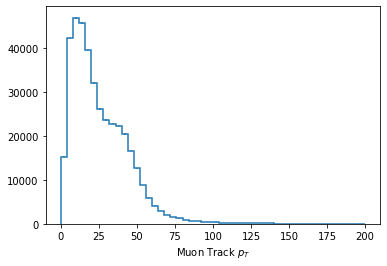

In [3]:
h = (Hist.new
     .Reg(50, 0, 200, name='mu_pt', label='Muon Track $p_T$')
     .Int64()
     )
h.fill(data['mu_pt'])
_ = h.plot()